In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import os
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import cv2
import tensorflow
from PIL import Image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [3]:
folder_dir = "F:\dataset\Emoji Dataset-20220328T190340Z-001\Emoji Dataset"

In [4]:
import os
y_unique = os.listdir(folder_dir)

In [5]:
y_unique

['checkmark', 'cloud', 'croissant', 'heart', 'laugh', 'smile', 'sun']

In [6]:
dict = {'checkmark':0 , 'cloud':1 , 'croissant':2 , 'heart':3 , 'laugh':4 ,'smile':5  , 'sun':6}

In [7]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [8]:
import string
from keras.preprocessing.image import ImageDataGenerator
y=[]
x=[]

def generate_data(img , p):
#     img = load_img(img)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,)
    it = datagen.flow(samples, batch_size=1)
    j1 = 1
    for j in range(20):
        batch = it.next()
        image = batch[0].astype(int)
#         s = str(j1)
#         j1 = j1+1
#         cv2.imwrite(os.path.join(path , itr , s , '.jpg'), image)
        image = np.array(image).astype(float)
        image = image.reshape(28 , 28)
        x.append(image)
        y.append(itr)
for itr in os.listdir(folder_dir):
    for itr1 in os.listdir(os.path.join(folder_dir , itr)):
        img = (cv2.imread(os.path.join(folder_dir , itr , itr1) , cv2.IMREAD_GRAYSCALE))
        img_pil = Image.fromarray(img)
        img = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
        generate_data(img , itr)
        x.append(img)
        y.append(itr)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [9]:
x = np.array(x)

In [10]:
np.max(x[0])

255.0

In [11]:
x.shape

(7434, 28, 28)

In [12]:
x = x.reshape(x.shape[0] , 28 , 28 , 1)

In [13]:
len(y)

7434

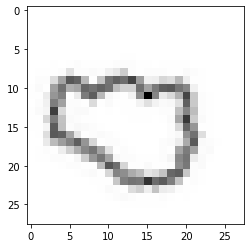

In [14]:
plt.imshow(x[1111] , cmap = 'gray')

In [15]:
x

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [254.],
         [254.]],

        [[255.],
         [255.],
      

In [16]:
len(x)

7434

In [17]:
len(y)

7434

In [18]:
x = np.array(x)

In [19]:
y = np.array(y)

In [20]:
for i in range(len(y)):
    y[i]=dict[y[i]]

In [21]:
y[:5]

array(['0', '0', '0', '0', '0'], dtype='<U9')

In [22]:
x = x.reshape(x.shape[0] , 28 , 28)

In [23]:
for i in range(x.shape[0]):
    x[i]=x[i].astype(np.uint8)
    ret, x[i] = cv2.threshold(x[i], 200, 255, cv2.THRESH_BINARY_INV)
    x[i] = cv2.GaussianBlur(x[i], (3, 3), 0)

In [24]:
x = x.astype(int)
y = y.astype(int)

In [25]:
x[195].shape

(28, 28)

In [26]:
img_list = np.copy(x)
x.shape

(7434, 28, 28)

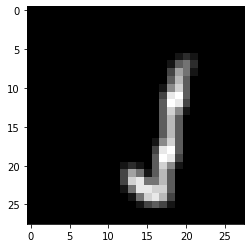

In [27]:
plt.imshow(img_list[195] , cmap = 'gray')

In [28]:
y[195]

0

In [29]:
df = pd.DataFrame()
x_copy = np.copy(x)

In [30]:
final = []
for i in range(x_copy.shape[0]):
    img=x_copy[i].flatten()
    final.append([y[i]])
    for j in img: 
        final[i].append(j)

In [31]:
final[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 31,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 47,
 95,
 47,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 95,
 143,
 63,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [32]:
df = pd.DataFrame(final)

In [33]:
df = df.sample(frac=1)

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
2547,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6118,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7322,6,0,0,0,0,0,0,0,0,0,...,255,255,223,127,31,0,0,0,0,0
2154,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6443,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.to_csv('emoji.csv' , index = False)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
x_train = x_train / 255
x_test = x_test / 255

In [38]:
y_train[:10]

array([6, 4, 4, 6, 4, 0, 0, 1, 0, 2])

In [39]:
x_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.05882353, ..., 0.05882353,
         0.        , 0.        ],
        [0.        , 0.        , 0.18431373, ..., 0.18431373,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [40]:
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

In [41]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 12)        312       
                                                                 
 dropout (Dropout)           (None, 12, 12, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 150)               5

In [43]:
model.fit(x_train ,y_train , epochs = 30)

Epoch 1/30
175/175 [==============================] - 4s 10ms/step - loss: 1.6054 - accuracy: 0.3517
Epoch 2/30
175/175 [==============================] - 2s 13ms/step - loss: 1.0770 - accuracy: 0.6115
Epoch 3/30
175/175 [==============================] - 1s 8ms/step - loss: 0.9263 - accuracy: 0.6588
Epoch 4/30
175/175 [==============================] - 2s 13ms/step - loss: 0.8089 - accuracy: 0.7092
Epoch 5/30
175/175 [==============================] - 2s 13ms/step - loss: 0.6973 - accuracy: 0.7523
Epoch 6/30
175/175 [==============================] - 2s 11ms/step - loss: 0.6305 - accuracy: 0.7758
Epoch 7/30
175/175 [==============================] - 2s 12ms/step - loss: 0.5638 - accuracy: 0.8030
Epoch 8/30
175/175 [==============================] - 1s 8ms/step - loss: 0.5323 - accuracy: 0.8169
Epoch 9/30
175/175 [==============================] - 1s 8ms/step - loss: 0.4821 - accuracy: 0.8341
Epoch 10/30
175/175 [==============================] - 1s 8ms/step - loss: 0.4452 - accuracy: 

In [44]:
test_loss, test_acc = model.evaluate(x_test,  y_test , verbose=2)
print('\nTest accuracy:', test_acc)

59/59 - 1s - loss: 0.1389 - accuracy: 0.9521 - 602ms/epoch - 10ms/step

Test accuracy: 0.9521247744560242


In [45]:
img = x[0]

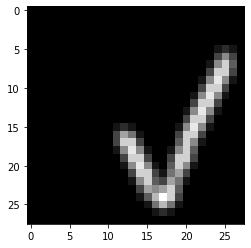

In [46]:
plt.imshow(img , cmap = 'gray')

In [47]:
for i in range(x_train.shape[0]):
    x_train[i] = np.array([x_train[i]])
for i in range(x_test.shape[0]):
    x_test[i] = np.expand_dims(x_test[i], axis=0)


In [48]:
x_train[10].shape

(28, 28)

In [49]:
predictions = model.predict(x_test)

In [50]:
np.argmax(predictions[70])

2

In [51]:
predictions[5]

array([2.2244856e-02, 1.5558609e-07, 4.9516326e-03, 9.7199148e-01,
       9.5540418e-06, 6.6593383e-04, 1.3642044e-04], dtype=float32)

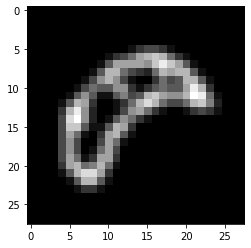

In [52]:
plt.imshow(x_test[70] , cmap = 'gray')

In [53]:
model.save('emoji_model.h5')

In [54]:
model.save_weights('./emoji_model')

In [55]:
df1 = pd.read_csv('emoji.csv')

In [56]:
df1

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,255,255,223,127,31,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7432,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
model.save('model_emoji.h5')